In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train_df = pd.read_csv(r'C:\Users\qazim\Downloads\temp data\titanic\train.csv',encoding= 'unicode_escape')

In [23]:
train_df.shape

(891, 12)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [27]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [28]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

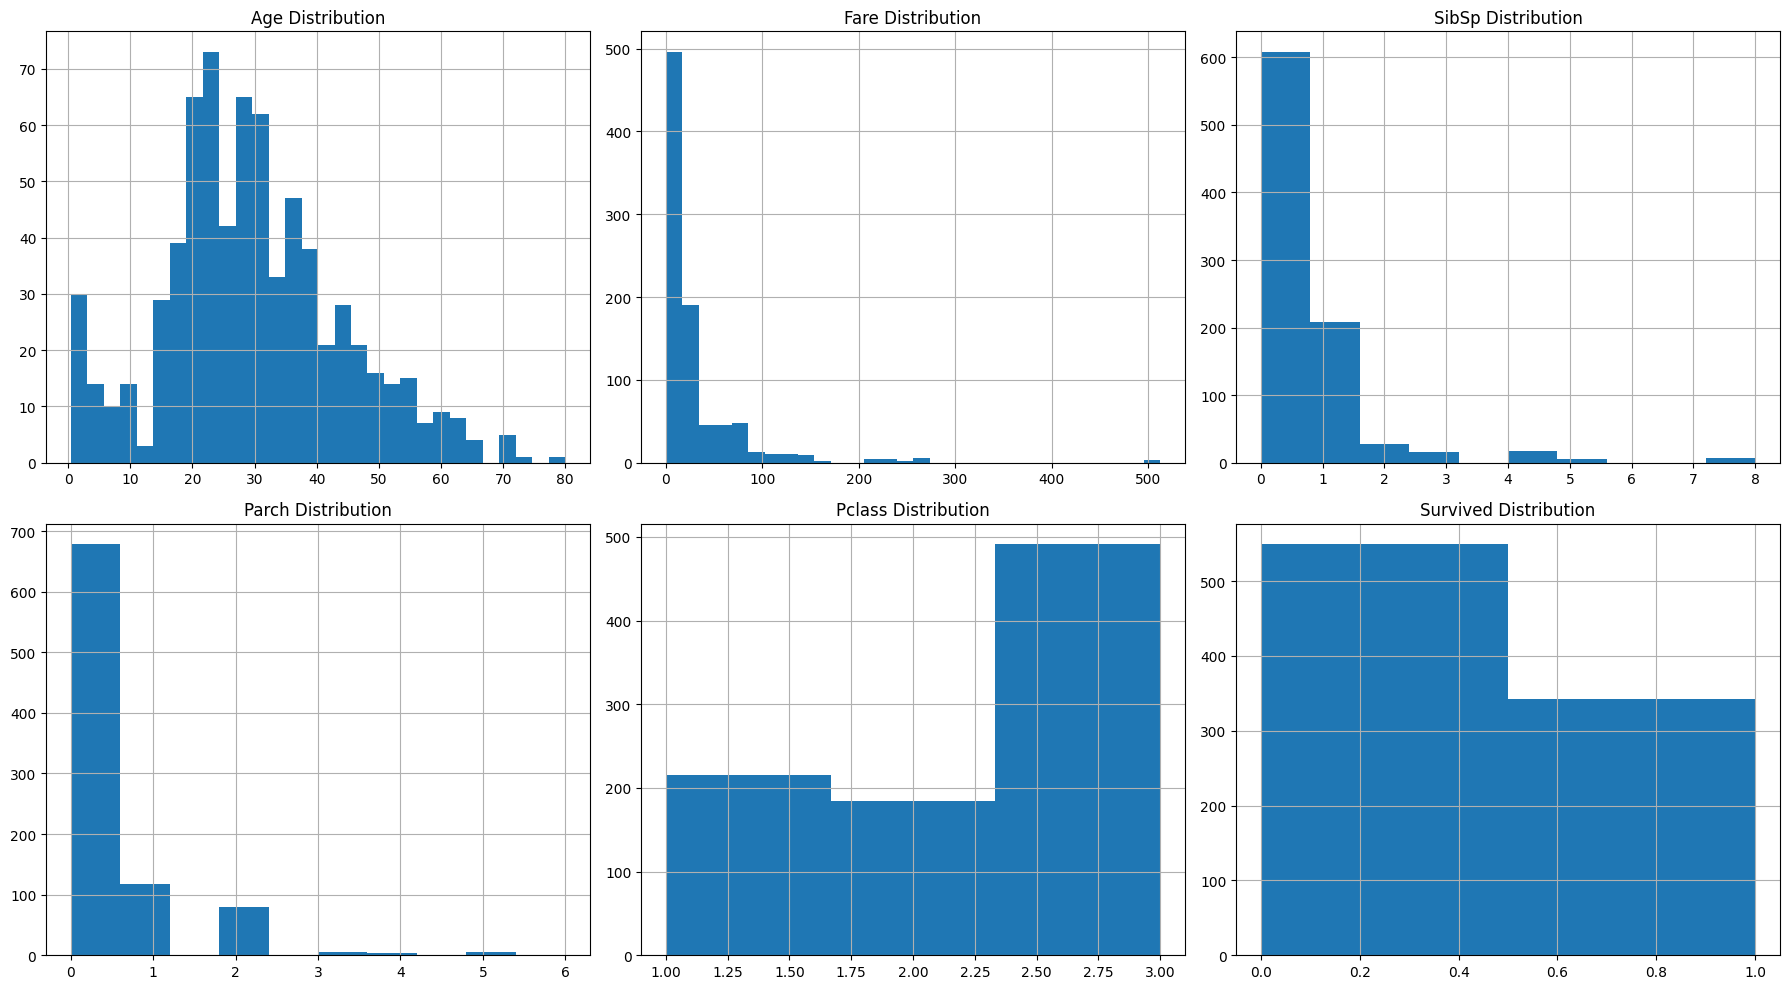

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
train_df['Age'].hist(bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

train_df['Fare'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution')

train_df['SibSp'].hist(bins=10, ax=axes[0, 2])
axes[0, 2].set_title('SibSp Distribution')

train_df['Parch'].hist(bins=10, ax=axes[1, 0])
axes[1, 0].set_title('Parch Distribution')

train_df['Pclass'].hist(bins=3, ax=axes[1, 1])
axes[1, 1].set_title('Pclass Distribution')

train_df['Survived'].hist(bins=2, ax=axes[1, 2])
axes[1, 2].set_title('Survived Distribution')

plt.tight_layout()
plt.show()


In [ ]:
Most passengers were in 3rd class, with a majority not surviving, and the age distribution was wide but included few infants or elders.

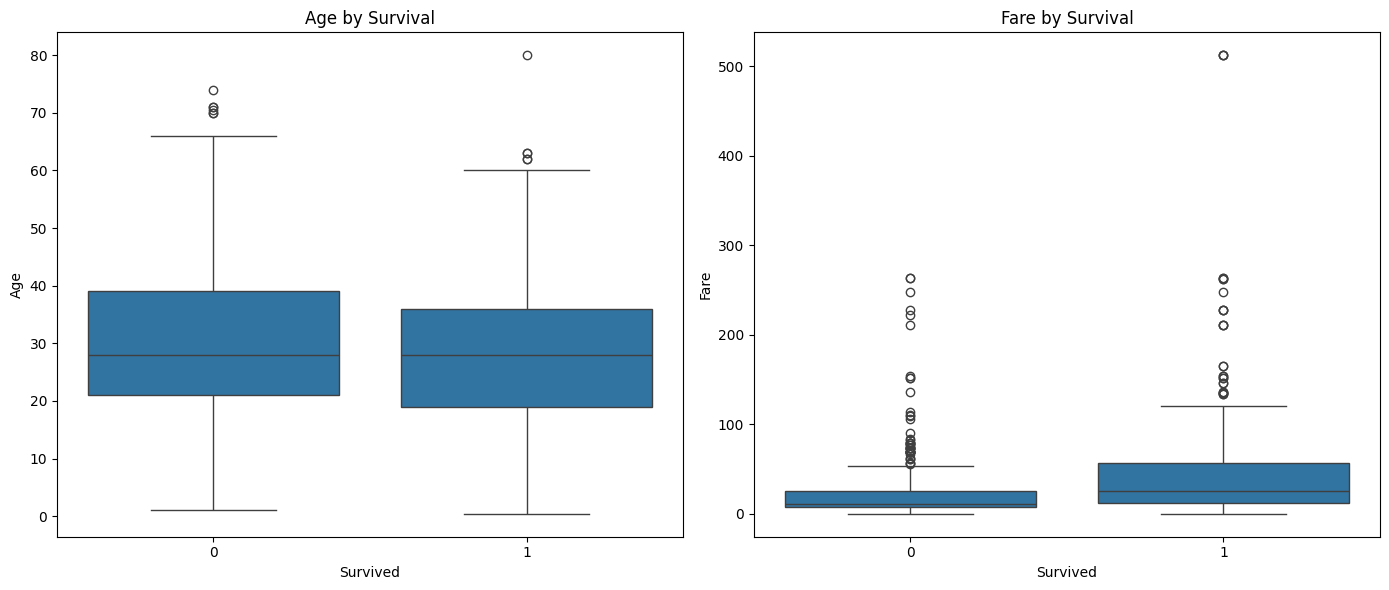

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Survived', y='Age', data=train_df, ax=axes[0])
axes[0].set_title('Age by Survival')
sns.boxplot(x='Survived', y='Fare', data=train_df, ax=axes[1])
axes[1].set_title('Fare by Survival')
plt.tight_layout()
plt.show()


In [ ]:
Survivors were generally younger, and higher fares were associated with better survival rates.

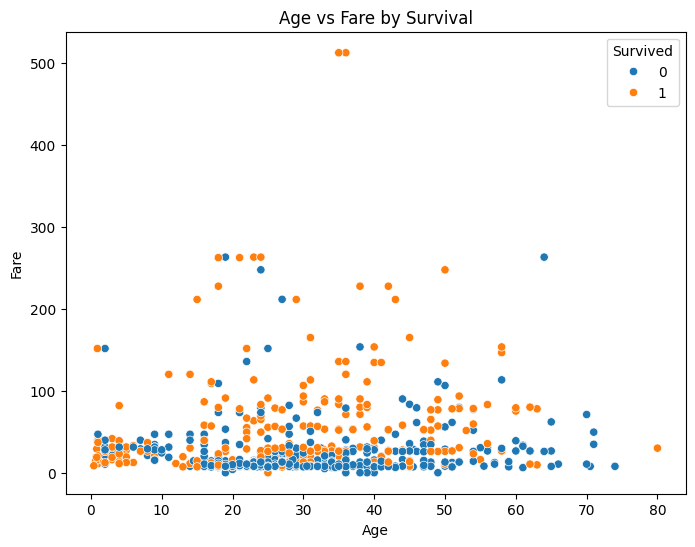

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Age vs Fare by Survival')
plt.show()

In [ ]:
No strong direct relationship, but most survivors paid higher fares.
Younger survivors cluster at higher fares.

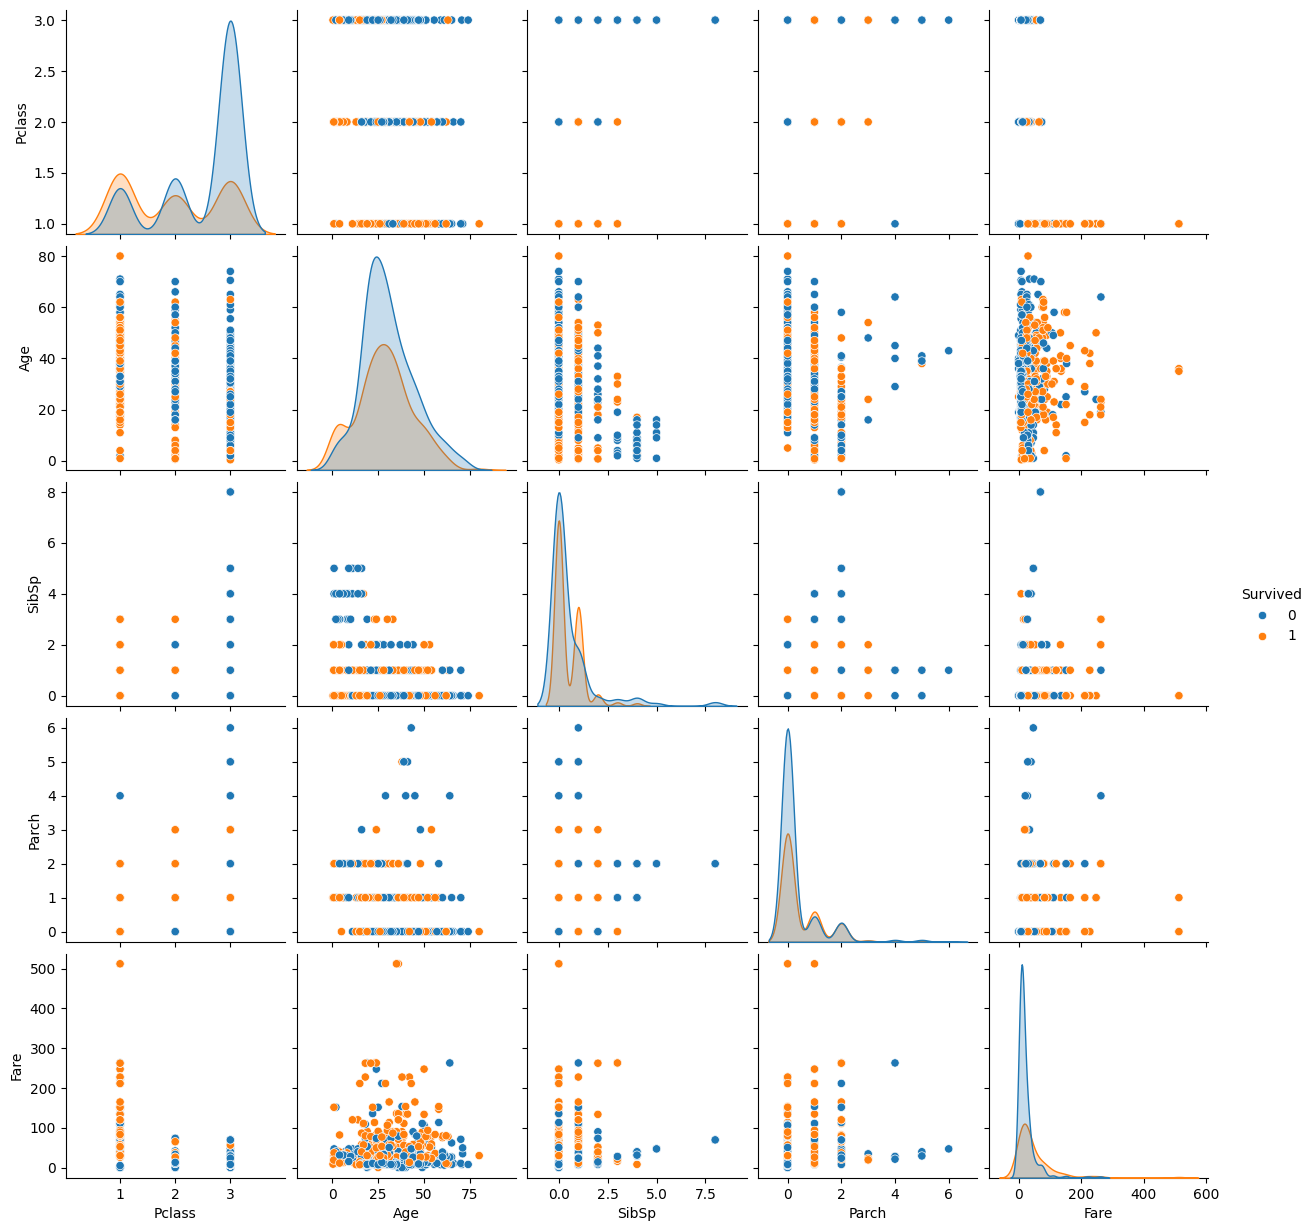

In [39]:
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']], hue='Survived')
plt.show()

In [ ]:
Third class and low fare dominate non-survivors.
Higher fares and lower class numbers (first class) correlate with survival.

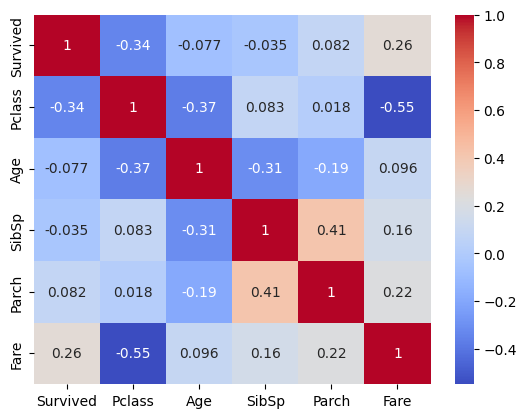

In [40]:
corr = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
Survival positively correlated with Fare and negatively with Pclass.
Age correlation is weak.

In [2]:
print("""
Summary of Findings:

1. Class & Fare: First-class passengers and those with higher fares were more likely to survive.
2. Gender: Women had a much higher survival rate (see value_counts and boxplot by Sex).
3. Age: Younger children had improved odds of survival, especially infants.
4. Family Size: SibSp/Parch features (siblings/parents/children aboard) affect survival — small families fared better.
5. Embarked: Most passengers departed from port 'S,' but survival varied by port.
""")



Summary of Findings:

1. Class & Fare: First-class passengers and those with higher fares were more likely to survive.
2. Gender: Women had a much higher survival rate (see value_counts and boxplot by Sex).
3. Age: Younger children had improved odds of survival, especially infants.
4. Family Size: SibSp/Parch features (siblings/parents/children aboard) affect survival — small families fared better.
5. Embarked: Most passengers departed from port 'S,' but survival varied by port.

